In [1]:
# import subprocess
# import os

# result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
# output = result.stdout
# for line in output.splitlines():
#     if '=' in line:
#         var, value = line.split('=', 1)
#         os.environ[var] = value

In [2]:
from cfg import *

os.environ['NLTK_DATA'] = os.getcwd()+"/nltk_data"
os.getenv('NLTK_DATA')
##### main
data = json.load(open(Config.data_path+"train.json"))
data_pd=pd.DataFrame(data)
len(data_pd[data_pd['tokens'].apply(len)>2024])

30

In [3]:
Config.savepath

'/home/z1933/workplace/machinelearning/PII-Data-Detection//modelsave'

In [3]:
data_pd.iloc[data_pd.full_text.str.len().idxmax()]

document                                                           21720
full_text              In this assignment, a reflective report will b...
tokens                 [In, this, assignment, ,, a, reflective, repor...
trailing_whitespace    [True, True, False, True, True, True, True, Tr...
labels                 [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
Name: 6365, dtype: object

In [4]:
tokenizer = AutoTokenizer.from_pretrained(Config.model_name)
tokenized_input =tokenizer(data_pd.iloc[data_pd.full_text.str.len().idxmax()]['full_text'],return_tensors='pt')

/home/z1933/miniconda3/envs/d2l/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [5]:
# tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
len(tokenized_input["input_ids"])
tokenized_input["input_ids"].size()

torch.Size([1, 2900])

In [6]:
tokenized_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [7]:
from itertools import chain
#将所有数据的labels连接在一起,然后查重,转成list的格式,然后从小到大排序
all_labels = sorted(list(set(chain(*[x["labels"] for x in data]))))
print(f"all_labels:{all_labels}")
label2id = {l: i for i,l in enumerate(all_labels)}
#这个是{id:label},上面是{label:id}
id2label = {v:k for k,v in label2id.items()}
label2id

all_labels:['B-EMAIL', 'B-ID_NUM', 'B-NAME_STUDENT', 'B-PHONE_NUM', 'B-STREET_ADDRESS', 'B-URL_PERSONAL', 'B-USERNAME', 'I-ID_NUM', 'I-NAME_STUDENT', 'I-PHONE_NUM', 'I-STREET_ADDRESS', 'I-URL_PERSONAL', 'O']


{'B-EMAIL': 0,
 'B-ID_NUM': 1,
 'B-NAME_STUDENT': 2,
 'B-PHONE_NUM': 3,
 'B-STREET_ADDRESS': 4,
 'B-URL_PERSONAL': 5,
 'B-USERNAME': 6,
 'I-ID_NUM': 7,
 'I-NAME_STUDENT': 8,
 'I-PHONE_NUM': 9,
 'I-STREET_ADDRESS': 10,
 'I-URL_PERSONAL': 11,
 'O': 12}

========================================================================================================================
Layer (type:depth-idx)                                                 Output Shape              Param #
========================================================================================================================
NLPModel                                                               [1, 100, 13]              --
├─DebertaV2ForTokenClassification: 1-1                                 [1, 100, 13]              --
│    └─DebertaV2Model: 2-1                                             [1, 100, 1024]            --
│    │    └─DebertaV2Embeddings: 3-1                                   [1, 100, 1024]            131,176,448
│    │    └─DebertaV2Encoder: 3-2                                      [1, 100, 1024]            302,835,712
│    └─Dropout: 2-2                                                    [1, 100, 1024]            --
│    └─Linear: 2-3                                                     [1, 100, 13]              13,325
========================================================================================================================
Total params: 434,025,485
Trainable params: 434,025,485
Non-trainable params: 0
Total mult-adds (M): 484.93
========================================================================================================================
Input size (MB): 0.00
Forward/backward pass size (MB): 423.44
Params size (MB): 1734.00
Estimated Total Size (MB): 2157.45
=======================================================================================================================

## EDA

In [8]:
tranjs_path="dataset/train.json"
train_df = json.load(open(tranjs_path))
print(f"len(train_df):{len(train_df)}, train_df[0].keys(): {list(train_df[0].keys())}")
print("-"*50)


print(f"train_df length:", len(train_df))

labels = set()
label_counts = {}
for i in range(len(train_df)):
    labels.update(train_df[i]['labels'])
    for label in train_df[i]['labels']:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
            
print(f"labels: {labels}")
print('-'*25)
print(f"label_counts: {label_counts}")

len(train_df):6807, train_df[0].keys(): ['document', 'full_text', 'tokens', 'trailing_whitespace', 'labels']
--------------------------------------------------
train_df length: 6807
labels: {'I-NAME_STUDENT', 'I-STREET_ADDRESS', 'I-ID_NUM', 'O', 'B-STREET_ADDRESS', 'B-URL_PERSONAL', 'B-USERNAME', 'I-URL_PERSONAL', 'I-PHONE_NUM', 'B-NAME_STUDENT', 'B-ID_NUM', 'B-EMAIL', 'B-PHONE_NUM'}
-------------------------
label_counts: {'O': 4989794, 'B-NAME_STUDENT': 1365, 'I-NAME_STUDENT': 1096, 'B-URL_PERSONAL': 110, 'B-EMAIL': 39, 'B-ID_NUM': 78, 'I-URL_PERSONAL': 1, 'B-USERNAME': 6, 'B-PHONE_NUM': 6, 'I-PHONE_NUM': 15, 'B-STREET_ADDRESS': 2, 'I-STREET_ADDRESS': 20, 'I-ID_NUM': 1}


/tmp/ipykernel_182926/2973842147.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'B-NAME_STUDENT'),
 Text(1, 0, 'I-NAME_STUDENT'),
 Text(2, 0, 'B-URL_PERSONAL'),
 Text(3, 0, 'B-EMAIL'),
 Text(4, 0, 'B-ID_NUM'),
 Text(5, 0, 'I-URL_PERSONAL'),
 Text(6, 0, 'B-USERNAME'),
 Text(7, 0, 'B-PHONE_NUM'),
 Text(8, 0, 'I-PHONE_NUM'),
 Text(9, 0, 'B-STREET_ADDRESS'),
 Text(10, 0, 'I-STREET_ADDRESS'),
 Text(11, 0, 'I-ID_NUM')]

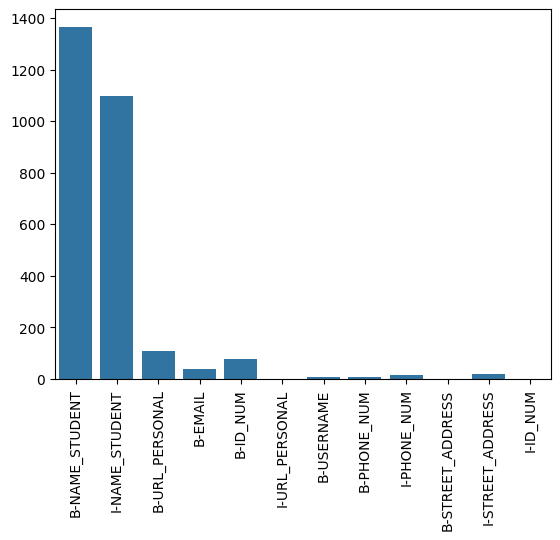

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# EDA
# display bar
import copy
display_label=copy.copy(label_counts)
del  display_label['O']
y =  [i for i in display_label.values()]

g=sns.barplot(x=list(display_label.keys()),y=y)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [10]:
tmp_list=[]
for i in train_df:
    for j in range(0,len(i['tokens'])):
        if i['tokens'][j].isspace() and i['labels'][j]!='O':
            tmp_list.append([i['tokens'][j-1],i['labels'][j-1],i['tokens'][j],i['labels'][j],i['tokens'][j+1],i['labels'][j+1]])
tmp_list

[['656',
  'I-STREET_ADDRESS',
  '\n',
  'I-STREET_ADDRESS',
  'Joshuamouth',
  'I-STREET_ADDRESS'],
 ['419',
  'I-STREET_ADDRESS',
  '\n',
  'I-STREET_ADDRESS',
  'Andreahaven',
  'I-STREET_ADDRESS']]

In [11]:
df_train=pd.DataFrame(train_df)
df_train_tokens=[]
for row in df_train.itertuples(index=False):
    for i in range(len(row.tokens)):
        df_train_tokens.append((row.document,row.tokens[i],row.labels[i]))
df_train_tokens=pd.DataFrame(df_train_tokens,columns=['document','tokens','labels'])
df_train_tokens

,document,tokens,labels
0,7,Design,O
1,7,Thinking,O
2,7,for,O
3,7,innovation,O
4,7,reflexion,O
...,...,...,...
4992528,22687,process,O
4992529,22687,explained,O
4992530,22687,above,O
4992531,22687,.,O


In [12]:
# inspect specific label
inspect="PHONE"
df_temp=df_train_tokens.loc[ df_train_tokens.labels.str.contains(inspect)]
print(df_temp.to_string())

        document        tokens       labels
150909      4381             (  B-PHONE_NUM
150910      4381       320)202  I-PHONE_NUM
150911      4381             -  I-PHONE_NUM
150912      4381    0688x95843  I-PHONE_NUM
179880      4777             (  B-PHONE_NUM
179881      4777       223)392  I-PHONE_NUM
179882      4777             -  I-PHONE_NUM
179883      4777          2765  I-PHONE_NUM
286835      6243             (  B-PHONE_NUM
286836      6243       820)913  I-PHONE_NUM
286837      6243             -  I-PHONE_NUM
286838      6243      3241x894  I-PHONE_NUM
287266      6243             (  B-PHONE_NUM
287267      6243       820)913  I-PHONE_NUM
287268      6243             -  I-PHONE_NUM
287269      6243      3241x894  I-PHONE_NUM
287293      6243             (  B-PHONE_NUM
287294      6243       820)913  I-PHONE_NUM
287295      6243             -  I-PHONE_NUM
287296      6243      3241x894  I-PHONE_NUM
861215      9854  410.526.1667  B-PHONE_NUM


In [13]:
input_data=pd.DataFrame(data)


In [14]:
input_data.loc[input_data['document']==4381]

,document,full_text,tokens,trailing_whitespace,labels
185,4381,"WRITING CENTRE Level 3 East, Hub Central Nor...","[WRITING, CENTRE, , Level, 3, East, ,, Hub, C...","[True, True, False, True, True, False, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [15]:
def tokenize_and_align_labels(examples):
     
     tokenized_inputs = tokenizer(examples["full_text"], truncation=True,  padding='max_length',max_length=Config.maxlen,stride=Config.stridlen, return_overflowing_tokens=True)

     encoded_overflow =tokenized_inputs.input_ids
     print([len(x) for x in encoded_overflow])
     print(*tokenizer.batch_decode(encoded_overflow), sep="\n")
     
     return


In [16]:
# import spacy
# nlp = spacy.load("en_core_web_sm")

from nltk.tokenize import sent_tokenize

import time
from tqdm import tqdm,tqdm_notebook
import re

In [17]:
# print all unicode character
def has_unicode_codepoints(text):
    return any(ord(char) > 127 for char in text)
tmp_set=set()
pattern =re.compile(r"[^\u0000-\u00ff]")
for i in data:
    for j in i['tokens']:
        if has_unicode_codepoints(j):
            tmp_set.add(j)
for i in tmp_set:
    print(i)

​teach​
​simultaneous​
multi-­‐stakeholder
​Stories
stuffs​
Is”(1
​two​
​user
launch”​.
sacriﬁces
​include​
-­‐end-­‐
​team​
   
​past.​
​gives​
deﬁning
​retailer.​
​challenges;​
30­40
ineﬀectively
​competitors​
​called
inﬂuencers
​THINKING
’’
customer”—it

reﬁned
that​
​great​
•Insight
green”-
workﬂow
​pilot​
​groups
​000​
​humanity,​
​In
mere​
​delicious
​presentations​
frictionless​
sufﬁcient
​R5​
​story​
​Jobs,​
reﬂects
​free
4-­‐
This​
​questions​
left-­‐brain
​reasonably
​Intersession​
works?—provide
​nagging​
​society,​
e-­‐learning
​maps​
durability​.
​18
​“I
​steps​
​methods​
​-
​2
is‟
​relevant​
,​
To​
​key
​ones​
Cliché
perspectives​
​was
�
​losing​
beneﬁ;ed
​out​
​grade​
teacher),’Group
®
​sure​
​very​
​really
​pain,​
​whose​
​slide​
​note,​
​customer.​
ﬁnalized
​Each​
​Associate​
Instituto´s
​poem,​
​ways​
​enterprise​
​or
one-­‐and
​companies​
​online​
​it’s​
Resolution:​
​those​
​Also,​
problem-­‐
Group´s
​I​
​songs,​
GetSure​
​mine
Visualisation​
​redundancy​
prem

In [18]:
ds = Dataset.from_dict({
    "full_text": [x["full_text"] for x in data],
    "document": [x["document"] for x in data],
    "tokens": [x["tokens"] for x in data],
    "trailing_whitespace": [x["trailing_whitespace"] for x in data],
    "labels": [x["labels"] for x in data]
})


In [19]:
from unidecode import unidecode
import copy

# 转小写
def text_precessor(data):
    # 预处理
    # 文本转小写,unicode 轉換ascii
    # 转换失败转'*'
    data=copy.deepcopy(data)
    for i in tqdm(range(len(data)),desc="preprocess texe"):
        data[i]['full_text']=unidecode(data[i]['full_text'],errors='replace',replace_str='*')
        data[i]['full_text']=data[i]['full_text'].lower()
        for j in range(len(data[i]['tokens'])):
            data[i]['tokens'][j]=unidecode(data[i]['tokens'][j],errors='replace',replace_str='*')  
            data[i]['tokens'][j]=data[i]['tokens'][j].lower().strip()
    return data

In [20]:
# 分句子

def split_sentence(text):
    """
        分句子，返回列表
    """
    data_out=[]
    doc=sent_tokenize(text)
    split_sentence=doc
    length=len(split_sentence)
    idx=0
    while idx+Config.max_sen_count<length:
        split_sentence[idx+Config.max_sen_count-Config.stride]="[SEP]"+split_sentence[idx+Config.max_sen_count-Config.stride]
        if idx==0:
            data_out.append("".join(split_sentence[idx:idx+Config.max_sen_count]))
        else:
            data_out.append("".join(split_sentence[idx-Config.stride:idx+Config.max_sen_count]))
        idx+=Config.max_sen_count
    # deal with reminder
    if idx<Config.max_sen_count:# few sentences,concatenate directly
        data_out.append("".join(split_sentence[idx:length]))
    else:
        data_out.append("".join(split_sentence[idx-Config.stride:length]))
    return data_out

In [21]:
split_sentence(ds['full_text'][0])

["Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool I use to help all stakeholders finding their way through the complexity of a project is the  mind map.What exactly is a mind map?According to the definition of Buzan T. and Buzan B.(1999, Dessine-moi  l'intelligence.Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic  representation technique that follows the natural functioning of the mind and allows the brain's  potential to be released.Cf Annex1\n\nThis tool has many advantages:\n\n•  It is accessible to all and does not require significant material investment and can be done  quickly\n\n•  It is scalable\n\n•  It allows categorization and linking of information\n\n•  It can be applied to any type of situation: notetaking, problem solving, analysis, creation of  new ideas\n\n•  It is suitable for all people and is easy to learn\n\n•  It is fun and encourages exchanges\n\n•  It makes visible the

预测时，空缺值填'O'

In [22]:
def preprocesss(example,tokenizer,label2id,if_train):
    """
        预处理
        需要特判token为空字符的标签情况。需要特判berttoken多对一映射token情况,联系前后token判断一下就行
    """
    # unicode to ascii
    example['full_text']=unidecode(example['full_text'],errors='replace',replace_str='*')
    example['full_text']=example['full_text'].lower()
    for j in range(len(example['tokens'])):
        example['tokens'][j]=unidecode(example['tokens'][j],errors='replace',replace_str='*')
        example['tokens'][j]=example['tokens'][j].lower().strip()

    # split text
    example['splited_sens']=split_sentence(example['full_text'])
    
    example['berttokenpos2orgtokenpos']=[]
    example['bertlabels']=[]
    example['berttokenids']=[]
    example['berttokenmask']=[]
    example['berttokentoken_type_ids']=[]
    
    # tokenize splited_sen
    previs_sep=0
    org_token_id=0
    for splited_sen in example['splited_sens']:
        out=tokenizer(splited_sen)
        splited_strtokens=tokenizer.convert_ids_to_tokens(out['input_ids'])
        splited_token_len=len(splited_strtokens)
        berttoken_pos2orgtokenpos=[-1]*splited_token_len
        bertlabel=[-100]*splited_token_len        
        find_start=0
        splited_token_id=1
        nothit=0 # 连续多次没映射到说明有问题
        while splited_token_id < splited_token_len-1: # 不处理开头与末尾处的[CLS]与[SEP]
            if splited_strtokens[splited_token_id]=='[SEP]':
                bertlabel[splited_token_id]=-100
                berttoken_pos2orgtokenpos[splited_token_id]=-1
                if  splited_token_id!=1:
                    previs_sep=org_token_id
                else:
                    org_token_id=previs_sep
                splited_token_id+=1
                continue
            subtokenstr=splited_strtokens[splited_token_id]
            if(splited_strtokens[splited_token_id][0]=='▁') and len(splited_strtokens[splited_token_id])!=1:
                    subtokenstr=subtokenstr[1:]
            # find start of the substring
            find_start=example['tokens'][org_token_id].find(subtokenstr,find_start)
            if find_start != -1:
                berttoken_pos2orgtokenpos[splited_token_id]=org_token_id
                bertlabel[splited_token_id]=label2id[example['labels'][org_token_id]]
                find_start+=len(subtokenstr)
                nothit=0
            else:
                nothit+=1
                if nothit>3:
                    print("Warning:failed to hit multiple times in a row,nothit:{},doc_id:{}".format(nothit,example['document'])) # 方便调试
            if example['tokens'][org_token_id]:
                if find_start==-1:
                    # example['tokens'][org_token_id]='can',subtokenstr='cannot' 的情况
                    tmp_find=0
                    berttoken_pos2orgtokenpos[splited_token_id]=org_token_id # 只记录第一个label
                    bertlabel[splited_token_id]=label2id[example['labels'][org_token_id]]
                    while subtokenstr.find(example['tokens'][org_token_id],tmp_find)!=-1:
                        tmp_find+=len(example['tokens'][org_token_id])
                        org_token_id+=1
                    org_token_id-=1
                splited_token_id+=1
            if(find_start==-1 or find_start==len(example['tokens'][org_token_id])):
                org_token_id+=1
                find_start=0
        example['berttokenids'].append(out['input_ids'])
        example['berttokenmask'].append(out['attention_mask'])
        example['berttokentoken_type_ids'].append(out['token_type_ids'])
        example['berttokenpos2orgtokenpos'].append(berttoken_pos2orgtokenpos)
        example['bertlabels'].append(bertlabel)
    return example

In [23]:
# multiprocess
preprocesssed_ds=ds.map(preprocesss, fn_kwargs={'tokenizer':tokenizer,'label2id':label2id,'if_train':True},num_proc=16,desc="prepocessing data")
preprocesssed_ds

prepocessing data (num_proc=16):   0%|          | 0/6807 [00:00<?, ? examples/s]

Dataset({
    features: ['full_text', 'document', 'tokens', 'trailing_whitespace', 'labels', 'splited_sens', 'berttokenpos2orgtokenpos', 'bertlabels', 'berttokenids', 'berttokenmask', 'berttokentoken_type_ids'],
    num_rows: 6807
})

In [24]:
assert len(preprocesssed_ds[0]['berttokenids']) == len(preprocesssed_ds[0]['splited_sens'])

In [25]:
tmp_str="."
tmp_res=tokenizer(tmp_str)
tmp_res

{'input_ids': [1, 323, 2], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [28]:
tokenizer.convert_ids_to_tokens(tmp_res['input_ids'])

['[CLS]', '▁.', '[SEP]']

In [29]:
preprocesssed_ds[0]['berttokenpos2orgtokenpos'][1]

[-1,
 -1,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 447,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 467,
 468,
 469,
 470,
 471,
 473,
 474,
 475,
 476,
 477,
 477,
 478,
 479,
 479,
 480,
 481,
 482,
 482,
 482,
 483,
 483,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 520,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,


In [30]:
def expanddataset(ds,if_train=True):
    """
        将dataset的 bertlabels(if_train=True),berttokenpos2orgtokenpos expand到列,返回新的dataset
    """
    df=ds.to_pandas()
    merge_list_key=['berttokenpos2orgtokenpos','berttokenids','berttokenmask','berttokentoken_type_ids','bertlabels']
    # s1 = pd.DataFrame(df.pop('bertlabels').values.tolist(), 
    #       index=df.index).stack().rename('bertlabels').reset_index(level=1, drop=True)
    if not if_train:
        merge_list_key.pop()

    s_l=[]
    for i in merge_list_key:
        tmp_s= pd.DataFrame(df.pop(i).values.tolist(), 
                    index=df.index).stack().rename(i).reset_index(level=1, drop=True)
        s_l.append(tmp_s)
    df = df.join(pd.concat(s_l, axis=1))
    return Dataset.from_pandas(df)

In [31]:
# rebuid dataset 
full_ds=expanddataset(preprocesssed_ds)
full_ds.to_pandas()

,full_text,document,tokens,trailing_whitespace,labels,splited_sens,berttokenpos2orgtokenpos,berttokenids,berttokenmask,berttokentoken_type_ids,bertlabels,__index_level_0__
0,design thinking for innovation reflexion-avril...,7,"[design, thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",[design thinking for innovation reflexion-avri...,"[-1, 0, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 9, 9,...","[1, 587, 1291, 270, 3513, 28310, 4593, 271, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,...",0
1,design thinking for innovation reflexion-avril...,7,"[design, thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",[design thinking for innovation reflexion-avri...,"[-1, -1, 366, 367, 368, 369, 370, 371, 372, 37...","[1, 2, 390, 266, 813, 265, 841, 261, 584, 1653...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, -100, 12, 12, 12, 12, 12, 12, 12, 12, 1...",0
2,design thinking for innovation reflexion-avril...,7,"[design, thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",[design thinking for innovation reflexion-avri...,"[-1, -1, 661, 663, 664, 665, 666, 667, 668, 66...","[1, 2, 1218, 339, 584, 433, 1201, 275, 262, 34...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, -100, 12, 12, 12, 12, 12, 12, 12, 12, 1...",0
3,diego estrada\n\ndesign thinking assignment\n\...,10,"[diego, estrada, , design, thinking, assignmen...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",[diego estrada\n\ndesign thinking assignment\n...,"[-1, 0, 1, 1, 3, 4, 5, 7, 8, 10, 11, 12, 14, 1...","[1, 65944, 865, 88339, 587, 1291, 6190, 15895,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 2, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12...",1
4,diego estrada\n\ndesign thinking assignment\n\...,10,"[diego, estrada, , design, thinking, assignmen...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",[diego estrada\n\ndesign thinking assignment\n...,"[-1, -1, 282, 283, 284, 285, 286, 287, 288, 28...","[1, 2, 262, 380, 265, 266, 596, 1506, 25328, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, -100, 12, 12, 12, 12, 12, 12, 12, 12, 1...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
14796,"challenge\n\nso, a few months back, i had chos...",22681,"[challenge, , so, ,, a, few, months, back, ,, ...","[False, False, False, True, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[challenge\n\nso, a few months back, i had cho...","[-1, -1, 328, 329, 330, 331, 332, 333, 334, 33...","[1, 2, 1928, 261, 301, 696, 961, 271, 98969, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, -100, 12, 12, 12, 12, 12, 12, 12, 12, 1...",6804
14797,brainstorming\n\nchallenge & selection\n\nbrai...,22684,"[brainstorming, , challenge, &, selection, , b...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[brainstorming\n\nchallenge & selection\n\nbra...,"[-1, 0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 1...","[1, 30490, 1719, 429, 1857, 30490, 269, 266, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,...",6805
14798,brainstorming\n\nchallenge & selection\n\nbrai...,22684,"[brainstorming, , challenge, &,

In [29]:

import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import DataCollatorForTokenClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataset, val_dataset = torch.utils.data.random_split(full_ds, [0.8, 0.2]) #TODO:改变比例


2024-02-08 17:23:18.778147: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-08 17:23:19.000317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 17:23:19.000410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 17:23:19.032469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 17:23:19.104601: I tensorflow/core/platform/cpu_feature_guar

In [30]:
print(len(train_dataset))

11841


In [31]:
data_collator = Collate(tokenizer=tokenizer)
train_dataloader=DataLoader(train_dataset,batch_size=Config.batch_size,num_workers=8,pin_memory=True,collate_fn=data_collator,shuffle=True)
val_dataloader=DataLoader(val_dataset,batch_size=Config.batch_size,num_workers=8,pin_memory=True,collate_fn=data_collator)

In [32]:
from model1 import NLPModel
model=NLPModel(id2label,label2id).to(device)
from torch.optim import AdamW
from transformers import get_cosine_schedule_with_warmup
from seqeval.metrics import recall_score, precision_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score


optimizer= AdamW(model.parameters(),lr=Config.lr,weight_decay=Config.weight_decay)

scaler = torch.cuda.amp.GradScaler()
valstep = len(train_dataloader) /Config.evaltimes

num_train_steps = int(len(train_dataloader) * Config.epochs)
scheduler = get_cosine_schedule_with_warmup(
                optimizer, num_warmup_steps=Config.num_warmup_steps, num_training_steps=num_train_steps, 
            )

Some weights of DebertaV2ForTokenClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
def compute_metrics(predictions,traget, all_labels):
    
    # Remove ignored index (special tokens)
    true_predictions = [
        [all_labels[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, traget)
    ]
    true_labels = [
        [all_labels[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, traget)
    ]
    
    recall = recall_score(true_labels, true_predictions)
    precision = precision_score(true_labels, true_predictions)
    f1_score = (1 + 5*5) * recall * precision / (5*5*precision + recall)
    
    results = {
        'recall': recall,
        'precision': precision,
        'f1': f1_score
    }
    return results

def validation(val_dataloader,model):
    model.eval()

    allprecitions=[]
    alltargets=[]
    for step,dataset in enumerate(tqdm(val_dataloader)):
        
        with torch.no_grad():
            ids = dataset["ids"].to(device,non_blocking=True)
            mask = dataset["mask"].to(device,non_blocking=True)
            targets = dataset["targets"].to(device,non_blocking=True)
            tokentype = dataset["type_ids"].to(device,non_blocking=True)
            logit,loss = model(ids,mask, tokentype,targets)

            targets=targets.view(-1)
            targets = targets.detach().cpu().numpy()

            allprecitions.append(np.argmax(logit, axis=1))
            alltargets.append(targets)
            
    score=compute_metrics(allprecitions,alltargets,all_labels)
    model.train()

    return score

In [36]:
start_time=time.time()
bestscore=0
for epoch in range(Config.epochs):
    losses=[]
    for step,dataset in enumerate(tqdm(train_dataloader)):
        with torch.cuda.amp.autocast():
            ids = dataset["ids"].to(device,non_blocking=True)
            mask = dataset["mask"].to(device,non_blocking=True)
            targets = dataset["targets"].to(device,non_blocking=True)
            tokentype = dataset["type_ids"].to(device,non_blocking=True)

            logit,loss = model(ids,mask, tokentype,targets)
            loss/= Config.accumulation_steps

        # Accumulates scaled gradients.
        scaler.scale(loss).backward()
        losses.append(loss.item())

        if (step+1) % Config.accumulation_steps ==0:
            scaler.step(optimizer)
            # Updates the scale for next iteration.
            scaler.update()
            scheduler.step()
            optimizer.zero_grad()

        # report loss
        if (step+1) % Config.logging_steps ==0:
            print("Logging: Step [{}/{}] Loss: {:.3f} Time: {:.1f}".format(step, len(train_dataloader)-1, loss.item(), time.time()-start_time))
        # validation
        if epoch>0 and (step+1) % valstep == 0:
            scores=validation(val_dataloader,model)
            print("Validation: Step [{}/{}] Loss: {:.3f} Time: {:.1f} Metric: {}".format(step, len(train_dataloader)-1, loss.item(), time.time()-start_time,scores))
            if scores['f1']>bestscore:
                bestscore=scores['f1']
                print(f"Best score is {bestscore} → {scores['f1']}. Saving model")
                torch.save(model.state_dict(), os.path.join(Config.savepath,f"model_seed{Config.seed}.pth"))
            else:
                print("no improvement, bestf1 is {:.3f} score is {}".format(bestscore,scores))


os.system("/usr/bin/shutdown")

  0%|          | 1/5921 [00:09<15:36:30,  9.49s/it]

Logging: Step [1/5920] Loss: 2.950 Time: 18.1


  0%|          | 1/1480 [00:13<5:30:02, 13.39s/it]
/home/z1933/miniconda3/envs/d2l/lib/python3.9/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_117917/114672599.py:15: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = (1 + 5*5) * recall * precision / (5*5*precision + recall)


Validation: Step [1/5920] Loss: 2.950 Time: 53.3 Metric: {'recall': 0.0, 'precision': 0.0, 'f1': nan}
Best score is 0 → nan. Saving model


  0%|          | 1/5921 [01:06<108:52:17, 66.21s/it]


RuntimeError: Parent directory ./model-deberta-v3-large does not exist.